In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as mpl
import cPickle as cp
from scipy import stats
from scipy.misc import factorial
import numpy as np
import math
from decimal import Decimal

epoch = str(1384359000000)
file_names = ('DATA\MItoMI_2013-11-13_'+epoch+'_Graph.pkl', 
              'DATA\MItoProv_2013-11-13_'+epoch+'_Graph.pkl',
              'DATA\MItoProv_2013-11-13_'+epoch+'_provIDs.pkl',
              'DATA\SMS_2013-11-13_'+epoch+'_Graph.pkl')
save_file = "DATA\Basic_Metrics.pkl"

In [4]:
with open(file_names[0], "rb") as f:
    G = cp.load(f)

G = G.to_directed()  #make the graph directed
frozen = nx.freeze(G)

In [5]:
fc = lambda ksq, km : 1. - 1. / ((ksq / km) - 1.)

#find the critical threshold
def fcrit(perc, ps, fs):
    i = 0
    while ps[i] > perc:
        i += 1
        
    return fs[i]

rand_selection = G.nodes()
np.random.seed(1178973) #my ID number as seed to guarantee replicability
rand_selection = np.random.permutation(rand_selection)  #permute the list to eliminate any geographical meaning 
                                                        #to the removal of nodes, since they're linked (in order)  
                                                        #to a physical place in the city of Milan

targeted_sel = sorted([n for n in G], key = lambda n : G.degree(n), reverse=True)

#group nodes is set of m elements to speed up things a little
m = 100
rand_selection = [list(rand_selection[i:i+m]) for i in range(len(rand_selection))[0::m]]

targeted_sel = [list(targeted_sel[i:i+m]) for i in range(len(targeted_sel))[0::m]]

def remove_nodes(Graph, selection):
    fcs = []#[0.]
    Ps = []#[1.]
    l = float(len(Graph))
    removed_n = 0.
    for n in selection:        
        largest_cc = max(nx.connected_components(Graph), key=len)
        fcs.append(removed_n / l)
        Ps.append( float(len(largest_cc)) / l)
        Graph.remove_nodes_from(n)
        removed_n += len(list(n))
        
    return fcs, Ps       

In [6]:
f1, p1 = remove_nodes(nx.Graph(G), rand_selection) #copy G and 'unfreeze' the copy
f2, p2 = remove_nodes(nx.Graph(G), targeted_sel) #copy G and 'unfreeze' the copy

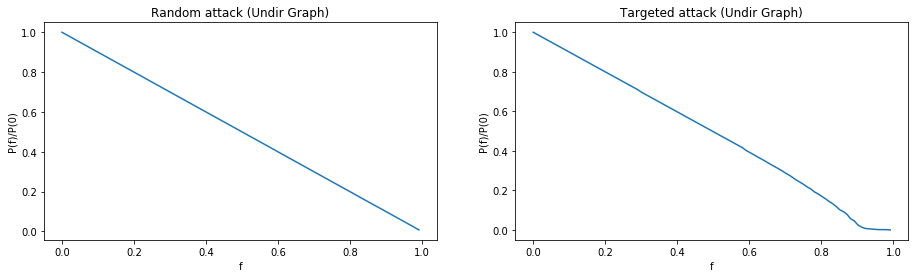

Critical thresholds (@ 1% of P(f)/P(0)): 0.99138794312 0.921289805728


In [7]:
mpl.subplot(1,2,1)
mpl.title("Random attack (Undir Graph)")
mpl.xlabel("f")
mpl.ylabel("P(f)/P(0)")
mpl.plot(f1, p1)

mpl.subplot(1,2,2)
mpl.title("Targeted attack (Undir Graph)")
mpl.xlabel("f")
mpl.ylabel("P(f)/P(0)")
mpl.plot(f2, p2)

mpl.subplots_adjust(left=-1, right=1, hspace=0.15, wspace=0.2)
mpl.show()

fcrit1 = fcrit(0.01, p1, f1)
fcrit2 = fcrit(0.01, p2, f2)
print "Critical thresholds (@ 1% of P(f)/P(0)):", fcrit1, fcrit2

In [8]:
with open(file_names[0], "rb") as f:
    G = cp.load(f)

frozen = nx.freeze(G)

target_sel_dir = sorted([n for n in G], key = lambda n : G.out_degree(n), reverse=True)
target_sel_dir = [list(target_sel_dir[i:i+m]) for i in range(len(target_sel_dir))[0::m]]

def remove_nodes_directed(DGraph, selection):
    fcs = []#[0.]
    Ps = []#[1.]
    l = float(len(DGraph))
    removed_n = 0.
    for n in selection:        
        largest_cc = max(nx.weakly_connected_components(DGraph), key=len)
        fcs.append(removed_n / l)
        Ps.append( float(len(largest_cc)) / l)
        DGraph.remove_nodes_from(n)
        removed_n += len(list(n))
        
    return fcs, Ps   

In [9]:
f3, p3 = remove_nodes_directed(nx.DiGraph(G), rand_selection) #copy G and 'unfreeze' the copy
f4, p4 = remove_nodes_directed(nx.DiGraph(G), target_sel_dir) #copy G and 'unfreeze' the copy

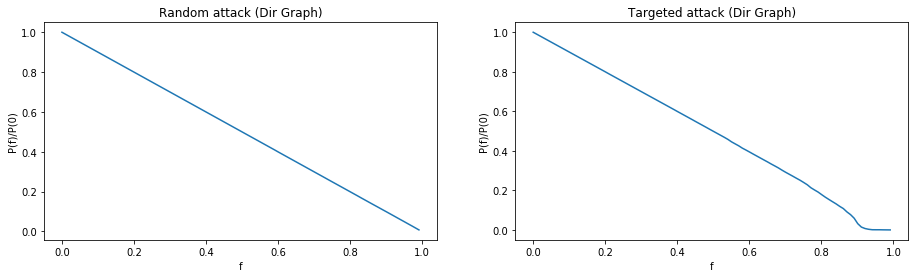

Critical thresholds (@ 1% of P(f)/P(0)): 0.99138794312 0.921289805728


In [10]:
mpl.subplot(1,2,1)
mpl.title("Random attack (Dir Graph)")
mpl.xlabel("f")
mpl.ylabel("P(f)/P(0)")
mpl.plot(f3, p3)

mpl.subplot(1,2,2)
mpl.title("Targeted attack (Dir Graph)")
mpl.xlabel("f")
mpl.ylabel("P(f)/P(0)")
mpl.plot(f4, p4)

mpl.subplots_adjust(left=-1, right=1, hspace=0.15, wspace=0.2)
mpl.show()

fcrit3 = fcrit(0.01, p3, f3)
fcrit4 = fcrit(0.01, p4, f4)
print "Critical thresholds (@ 1% of P(f)/P(0)):", fcrit3, fcrit4

In [13]:
with open(file_names[0], "rb") as f:
    G = cp.load(f)

frozen = nx.freeze(G)

target_sel_dir = sorted([n for n in G], key = lambda n : G.out_degree(n), reverse=True)
target_sel_dir = [list(target_sel_dir[i:i+m]) for i in range(len(target_sel_dir))[0::m]]

def remove_nodes_directed_strong(DGraph, selection):
    fcs = []#[0.]
    Ps = []#[1.]
    l = float(len(DGraph))
    removed_n = 0.
    for n in selection:        
        largest_cc = max(nx.strongly_connected_components(DGraph), key=len)
        fcs.append(removed_n / l)
        Ps.append( float(len(largest_cc)) / l)
        DGraph.remove_nodes_from(n)
        removed_n += len(list(n))
        
    return fcs, Ps   

In [14]:
f5, p5 = remove_nodes_directed_strong(nx.DiGraph(G), rand_selection) #copy G and 'unfreeze' the copy
f6, p6 = remove_nodes_directed_strong(nx.DiGraph(G), target_sel_dir) #copy G and 'unfreeze' the copy

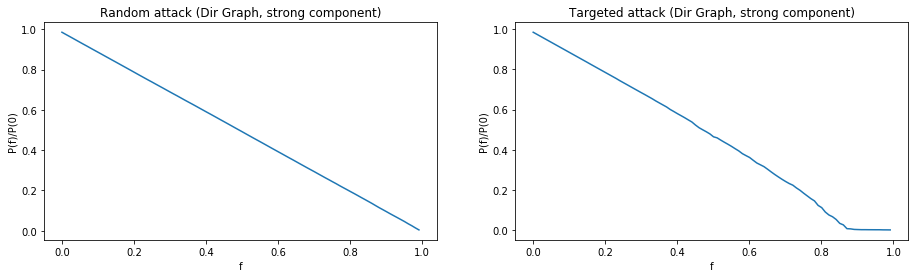

Critical thresholds (@ 1% of P(f)/P(0)): 0.99138794312 0.871219707591


In [15]:
mpl.subplot(1,2,1)
mpl.title("Random attack (Dir Graph, strong component)")
mpl.xlabel("f")
mpl.ylabel("P(f)/P(0)")
mpl.plot(f5, p5)

mpl.subplot(1,2,2)
mpl.title("Targeted attack (Dir Graph, strong component)")
mpl.xlabel("f")
mpl.ylabel("P(f)/P(0)")
mpl.plot(f6, p6)

mpl.subplots_adjust(left=-1, right=1, hspace=0.15, wspace=0.2)
mpl.show()

fcrit5 = fcrit(0.01, p5, f5)
fcrit6 = fcrit(0.01, p6, f6)
print "Critical thresholds (@ 1% of P(f)/P(0)):", fcrit5, fcrit6